In [17]:
import initial_conditions as ic
from amuse.units import units
import matplotlib.pyplot as plt
import numpy as np

In [18]:
bodies = ic.generate_initial_conditions(1|units.Msun,
                               1|units.MJupiter,
                               1|units.AU,
                               0.015|units.MEarth,
                               save_path=None)

In [19]:
bodies = ic.add_encounter(bodies, 1|units.Msun, 1|units.AU, 1|units.kms, 0,0,0)
# bodies = ic.add_encounter(bodies, 1|units.Msun, 0|units.AU, 10|units.kms, 0,0,90)

In [20]:
print(bodies)

                 key         mass         name           vx           vy           vz            x            y            z
                   -  1.98892e+30 * kg         none  3646245880.3572216 * m * s**-1  3646245880.3572216 * m * s**-1  3646245880.3572216 * m * s**-1  149597870691.0 * m  149597870691.0 * m  149597870691.0 * m
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========
 2875206453591699370    1.000e+00    host_star    0.000e+00    0.000e+00    0.000e+00    0.000e+00    0.000e+00    0.000e+00
16248059081757907076    9.546e-04       planet    0.000e+00    8.174e-06    0.000e+00    1.000e+00    0.000e+00    0.000e+00
 2253781491876240941    4.504e-08        moon0    0.000e+00    9.847e-06    0.000e+00    1.023e+00    0.000e+00    0.000e+00
12816001319934013476    1.000e+00   field_star   -0.000e+00   -0.000e+00   -2.743e-07    1.000e+00    0.000e+00    2.000e+01
====================  ===========  =======

In [21]:
from analyse_result import find_bound_pairs, bound, find_bound_particles
print(find_bound_pairs(bodies))
print(bound(bodies[0], bodies[2]))
moon_idx = [i for i, body in enumerate(bodies) if 'moon' in body.name]
print(moon_idx)
print(find_bound_particles(bodies))

[(0, 1), (0, 2), (0, 3), (1, 2)]
[ True]
[2]


/home/ybadoux/amuse-src/src/amuse/units/quantities.py:146: RuntimeWarning: invalid value encountered in divide
  operator.__truediv__(self.number, other.number),


{0: [1, 2, 3], 1: [0, 2], 2: [0, 1], 3: [0]}


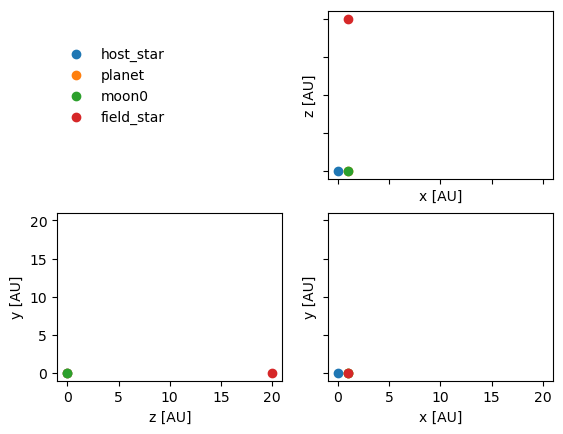

In [22]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True,sharey=True)
ax1.remove()
for body in bodies:
    # print(body)
    ax4.scatter(body.x.value_in(units.AU), body.y.value_in(units.AU), label=body.name)
    ax2.scatter(body.x.value_in(units.AU), body.z.value_in(units.AU))
    ax3.scatter(body.z.value_in(units.AU), body.y.value_in(units.AU))
# ax1.scatter(bodies.x.value_in(units.AU), bodies.y.value_in(units.AU))
# ax1.set_aspect('equal')
ax4.set_xlabel('x [AU]')
ax4.set_ylabel('y [AU]')

ax3.set_xlabel('z [AU]')
ax3.set_ylabel('y [AU]')

# ax2.scatter(bodies.x.value_in(units.AU), bodies.z.value_in(units.AU))
# ax2.set_aspect('equal')
ax2.set_xlabel('x [AU]')
ax2.set_ylabel('z [AU]')
fig.legend(loc=(0.1,0.7), frameon=False)
plt.show()

34672.3961347 day


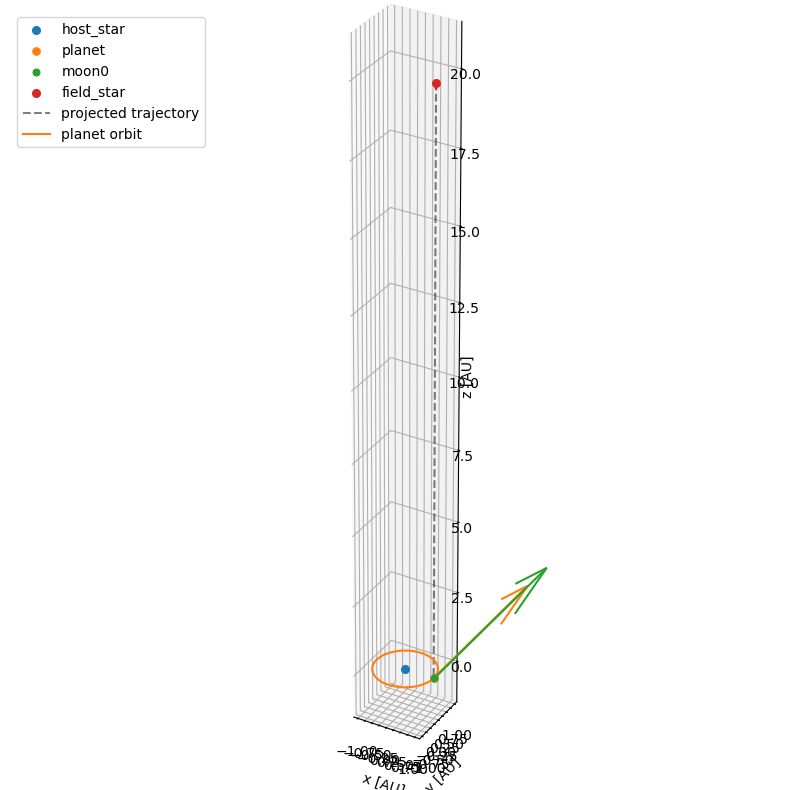

In [23]:
# make 3d plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for body in bodies:
    ax.scatter(body.x.value_in(units.AU), body.y.value_in(units.AU), body.z.value_in(units.AU),
                label=body.name, s=np.log10(body.mass.value_in(units.kg)))

#plot the veloctity vectors
for body in bodies:
    ax.quiver(body.x.value_in(units.AU), body.y.value_in(units.AU), body.z.value_in(units.AU),
              body.vx.value_in(units.kms)/5, body.vy.value_in(units.kms)/5, body.vz.value_in(units.kms)/5,
              color=ax._get_lines.get_next_color())
    
#find the encounter time
t_encounter = (bodies[0].position - bodies[3].position).length() / bodies[3].velocity.length()
print(t_encounter.in_(units.day))
    
#plot a line for the projected trajectory of bodies[3] until the encounter
ax.plot([bodies[3].x.value_in(units.AU), bodies[3].x.value_in(units.AU) + bodies[3].vx.value_in(units.AU/units.day)*t_encounter.value_in(units.day)],
        [bodies[3].y.value_in(units.AU), bodies[3].y.value_in(units.AU) + bodies[3].vy.value_in(units.AU/units.day)*t_encounter.value_in(units.day)],
        [bodies[3].z.value_in(units.AU), bodies[3].z.value_in(units.AU) + bodies[3].vz.value_in(units.AU/units.day)*t_encounter.value_in(units.day)],
        alpha=0.5, c='k', ls='--', label='projected trajectory')

#plot a ring of radius 1 AU around bodies[0]
theta = np.linspace(0,2*np.pi,100)
x = np.cos(theta)
y = np.sin(theta)
z = np.zeros_like(x)
ax.plot(x,y,z, c='tab:orange', label='planet orbit')

ax.set_aspect('equal')


ax.legend(loc='upper left')
ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')
ax.set_zlabel('z [AU]')
plt.show()

In [24]:
from run_simulation import run_simulation

bodies, errors = run_simulation(bodies, plot=False)

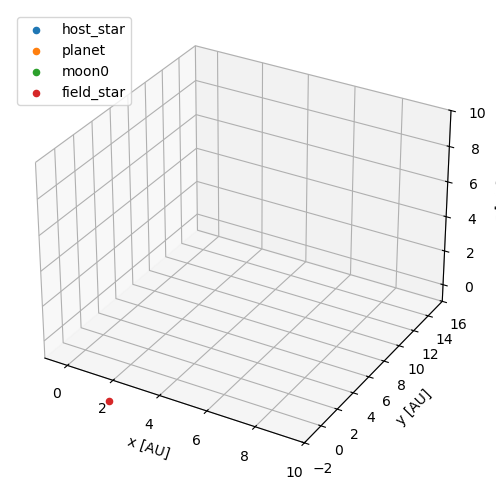

In [25]:
#3d plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
for body in bodies:
    ax.scatter(body.x.value_in(units.AU), body.y.value_in(units.AU), body.z.value_in(units.AU),
            label=body.name)
    # ax.quiver(body.x.value_in(units.AU), body.y.value_in(units.AU), body.z.value_in(units.AU),
    #             body.vx.value_in(units.kms)/10, body.vy.value_in(units.kms)/10, body.vz.value_in(units.kms)/10,
    #             color=ax._get_lines.get_next_color())
ax.legend(loc='upper left')
ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')
ax.set_zlabel('z [AU]')

ax.set_xlim(-1,10)
ax.set_ylim(-2,16)
ax.set_zlim(-1,10)

plt.show()
    

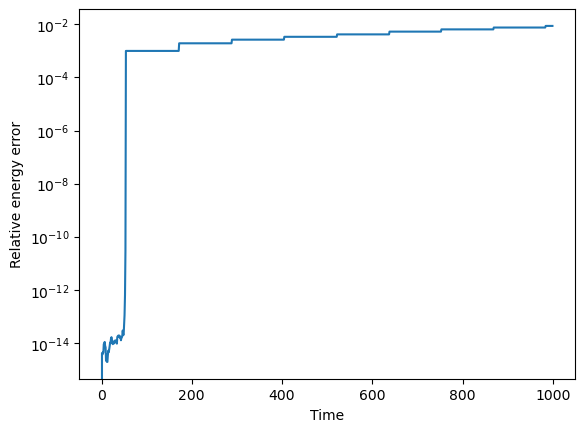

In [26]:
plt.figure()
plt.plot(errors)
plt.yscale('log')
plt.ylabel('Relative energy error')
plt.xlabel('Time')
plt.show()

In [27]:
print(bodies.name)

['host_star' 'planet' 'moon0' 'field_star']


In [28]:
print(['moon' in name for name in bodies.name])
print(np.sum(['moon' in name for name in bodies.name]))

[False, False, True, False]
1


In [29]:
from amuse.ext.orbital_elements import generate_binaries
from amuse.lab import Particles

                 key         mass           vx           vy           vz            x            y            z
                   -  1.98892e+30 * kg  3646245880.3572216 * m * s**-1  3646245880.3572216 * m * s**-1  3646245880.3572216 * m * s**-1  149597870691.0 * m  149597870691.0 * m  149597870691.0 * m
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========
12663982805719214830    1.000e+00    8.429e-10   -5.779e-06   -0.000e+00   -5.022e-01   -8.155e-04   -0.000e+00
17719128013567347451    1.000e+00    8.429e-10    5.774e-06    0.000e+00    4.978e-01   -8.155e-04    0.000e+00
13865776066662897425    9.546e-04   -1.766e-06    4.852e-06    0.000e+00    4.694e+00    1.708e+00    0.000e+00
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========
{0: [1], 1: [0, 2], 2: [1]}


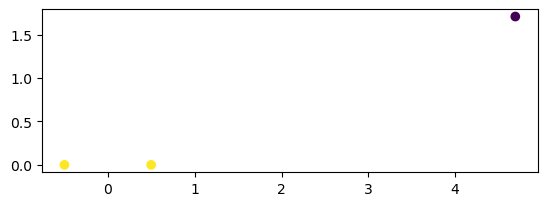

In [30]:
primary, secondary = generate_binaries(1 | units.Msun, 1 |units.Msun, 1 | units.AU)

test = Particles()
test.add_particle(primary)
test.add_particle(secondary)
test.move_to_center()

binary, planet = generate_binaries(2 | units.Msun, 1 |units.Mjupiter, 5 | units.AU, true_anomaly=20|units.deg)
test.add_particle(planet)

test.move_to_center()

print(test)

plt.scatter(test.x.value_in(units.AU), test.y.value_in(units.AU), c=test.mass.value_in(units.MJupiter))
plt.gca().set_aspect('equal')

print(find_bound_particles(test))

In [31]:
from analyse_result import analyse_result
print(analyse_result(bodies))

1
